In [3]:
import pandas as pd
import numpy as np
import sklearn 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [7]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [35]:
scaler = StandardScaler()
X = df.iloc[:,:-1]
y = df.iloc[:,-1]


In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 42)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [58]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [59]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_auc_score, roc_curve

print(f1_score(y_test, lr.predict(X_test)))

0.986046511627907


In [60]:
class_report = classification_report(y_test, lr.predict(X_test))
print('Classification Report:\n', class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98        63
           1       0.99      0.98      0.99       108

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



ROC-AUC Score: 1.00


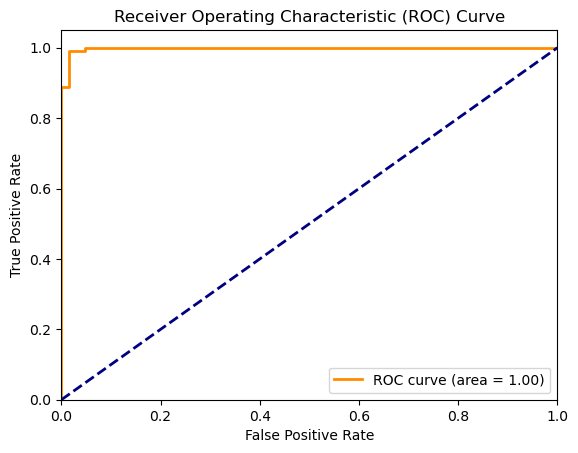

In [61]:
import matplotlib.pyplot as plt
roc_auc = roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1])
print(f'ROC-AUC Score: {roc_auc:.2f}')

fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:, 1])

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

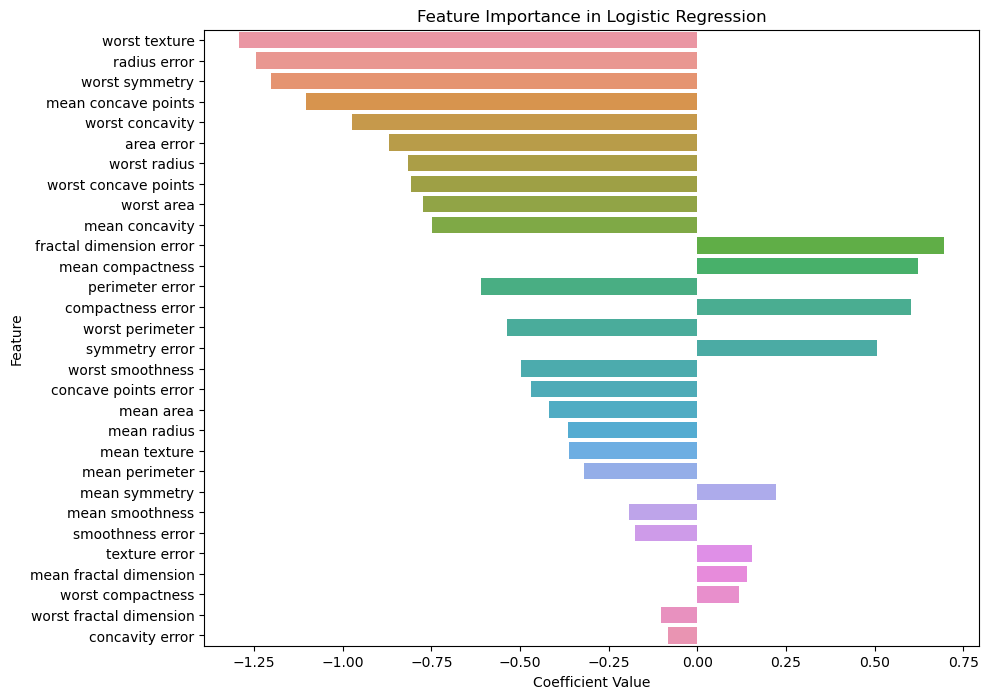

In [64]:
## feature importance
import seaborn as sns
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': lr.coef_[0]})

# Calculate the absolute value of the coefficients for sorting
coefficients['Abs_Coefficient'] = coefficients['Coefficient'].abs()

# Sort by absolute value of the coefficients
coefficients = coefficients.sort_values(by='Abs_Coefficient', ascending=False)

# Plot the coefficients
plt.figure(figsize=(10, 8))
sns.barplot(x='Coefficient', y='Feature', data=coefficients)
plt.title('Feature Importance in Logistic Regression')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()